In [25]:
import os
import numpy as np
#Experiment Nr.1a: load and analize the inference-results
format = 'q'
chip = 'cpu'
model_name_fcn = 'model_fc_1l_128'
model_name_cnn = 'model_conv1D_1l_5_5'

batch_sizes = np.load(f"/home/luca/Documents/Project/results_inference/{model_name_fcn}_inference_n_cpu_batch_sizes_100.npy").astype(np.float32)
#batch_sizes = [20000, 5, 6, 135, 9, 12, 16, 22, 30, 2721, 12197, 6694, 40, 819, 182, 55, 449, 74, 9036, 333, 16464, 1106, 1493, 3674, 607, 2016, 4959, 100, 246]
times_fcn = np.load(f"/home/luca/Documents/Project/results_inference/{model_name_fcn}_inference_{format}_{chip}_times_100.npy").astype(np.float32)
std_fcn = np.load(f"/home/luca/Documents/Project/results_inference/{model_name_fcn}_inference_{format}_{chip}_std_100.npy").astype(np.float32)

times_cnn = np.load(f"/home/luca/Documents/Project/results_inference/{model_name_cnn}_inference_{format}_{chip}_times_100.npy").astype(np.float32)
std_cnn = np.load(f"/home/luca/Documents/Project/results_inference/{model_name_cnn}_inference_{format}_{chip}_std_100.npy").astype(np.float32)

print(batch_sizes)
#print(times)

inf_fcn = times_fcn/batch_sizes #1 inference
inf_std_fcn = std_fcn/batch_sizes #std for 1 inference

time_av_fcn = inf_fcn.mean()    #average for 1 inference
std_av_fcn = np.sqrt(np.sum(inf_std_fcn**2))/len(inf_std_fcn)   #error propagation: f = sum/N

prediction_rate_fcn = 1/(time_av_fcn)           #1/inference_ave
std_final_fcn = std_av_fcn*(prediction_rate_fcn**2)         #error propagation: f = 1/t

print(f'Average time for 1 single event, FCN = {time_av_fcn} pm {std_av_fcn}')
print('Prediction rate = ', prediction_rate_fcn, 'pm', std_final_fcn)


#same thing for CNN
inf_cnn = times_cnn/batch_sizes
inf_std_cnn = std_cnn/batch_sizes

time_av_cnn = inf_cnn.mean()
std_av_cnn = np.sqrt(np.sum(inf_std_cnn**2))/len(inf_std_cnn)   #error propagation: f = sum/N

prediction_rate_cnn = 1/(time_av_cnn)
std_final_cnn = std_av_cnn*(prediction_rate_cnn**2)         #error propagation: f = 1/t

print(f'Average time for 1 single event, CNN = {time_av_cnn} pm {std_av_cnn}')
print('Prediction rate = ', prediction_rate_cnn, 'pm', std_final_cnn)



[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.]
Average time for 1 single event, FCN = 1.1001937309629284e-05 pm 2.3526155928266235e-07
Prediction rate =  90893.08290502298 pm 1943.6257279459576
Average time for 1 single event, CNN = 4.490160063141957e-05 pm 2.1171174012124537e-07
Prediction rate =  22270.92099029221 pm 105.00773626448931


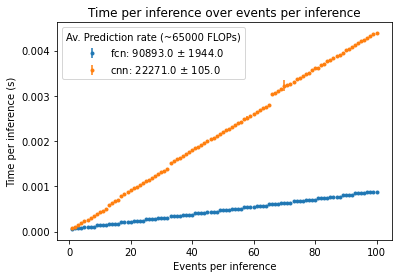

In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
#1b: Plot the inference results

#linear fit
#p = np.polyfit(batch_sizes, times_mean, 1)
#a, b = p[0], p[1]

plots_dir = '/home/luca/Documents/Project/plots'

fig, ax = plt.subplots(1,1)

#ax.set_xscale("log")
#ax.set_yscale("log")

ax.errorbar(batch_sizes, times_fcn, fmt=".", yerr=std_fcn, label = f'fcn: {np.round(prediction_rate_fcn)} $\pm$ {np.round(std_final_fcn)}')
ax.errorbar(batch_sizes, times_cnn, fmt=".", yerr=std_cnn, label = f'cnn: {np.round(prediction_rate_cnn)} $\pm$ {np.round(std_final_cnn)}')
#ax.plot(batch_sizes, batch_sizes*a + b, '--', label = 'fit: a*x + b, a='+str(round(a, 8)))

ax.set(title='Time per inference over events per inference')
ax.set(xlabel="Events per inference")
ax.set(ylabel="Time per inference (s)")
#ax.set_xlim(0, 20)
#ax.set_ylim(0, 0.002)
ax.legend(title = 'Av. Prediction rate (~65000 FLOPs)')
#plt.savefig(f"{plots_dir}/fcn_vs_cnn_{format}_{chip}_log.png")


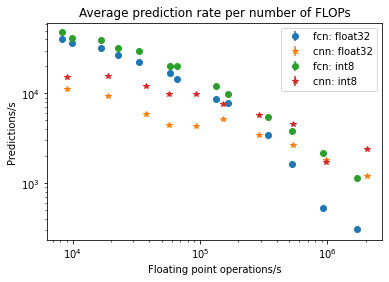

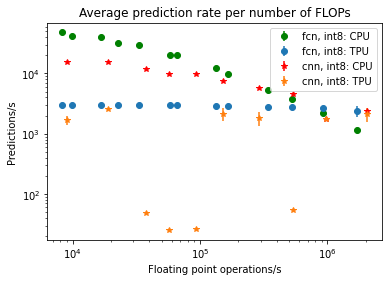

model_conv1D_2l_10_10 53.62137820101466 0.20869472535257497
model_conv1D_2l_10_10 2672.8760192264954 0.20869472535257497
model_conv1D_2l_20_10 1186.3301126089966 0.7710464897901274
model_conv1D_1l_5_1 11126.953420125054 2.752573266176846
model_conv1D_2l_10_20 1822.009030969963 0.17986027029601273
model_conv1D_1l_5_5 9443.625337527661 2.3878087709340203
model_conv1D_1l_5_5 15515.87674086437 5.590203499046899
model_fc_4l_350 305.0 6.0
model_fc_4l_350 1139.0 55.0
Highest rate FCN, normal: model_fc_1l_16 - 40561.03125 pm 61.93603515625
Highest rate FCN, quantized: model_fc_1l_16 - 1139.0 pm 55.0
Average rate FCN, TPU: 2860.406193659856 pm 47.80774928535468

Highest rate CNN, normal: model_conv1D_2l_20_10 - 11126.953420125054 pm 2.752573266176846
Highest rate CNN, quantized: model_conv1D_1l_5_5 - 2535.0421611118622 pm 39.51223837295157


In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
#Experiment Nr. 2: Plot the relation between inference time and FLOPs for networks
#Plot average inference time for 300000 events vs FLOPs-changes according to used network

path = "/home/luca/Documents/Project/results_inference"

times_mean_fc_int = np.load(f"{path}/plots_new/FCN_inference_int_cpu_mean_reps.npy").astype(np.float32)
times_std_fc_int = np.load(f"{path}/plots_new/FCN_inference_int_cpu_std_reps.npy").astype(np.float32)

times_mean_cnn_int = np.load(f"{path}/plots_new/CNN_1D_inference_int_cpu_mean.npy").astype(np.float32)
times_std_cnn_int = np.load(f"{path}/plots_new/CNN_1D_inference_int_cpu_std.npy").astype(np.float32)
times_mean_cnn_int = np.delete(times_mean_cnn_int, obj=4)
times_std_cnn_int = np.delete(times_std_cnn_int, obj=4)
times_mean_cnn_int = np.append(times_mean_cnn_int, 6.5601418e-5)
times_std_cnn_int = np.append(times_std_cnn_int, 2.54737e-8)
times_mean_cnn_int = np.append(times_mean_cnn_int, 5.761109e-4)
times_std_cnn_int = np.append(times_std_cnn_int, 2.583404e-8)



times_mean_fc_float = np.load(f"{path}/plots_new/FCN_inference_float_cpu_mean_reps.npy").astype(np.float32)
times_std_fc_float = np.load(f"{path}/plots_new/FCN_inference_float_cpu_std_reps.npy").astype(np.float32)

times_mean_cnn_float = np.load(f"{path}/plots_new/CNN_1D_inference_float_cpu_mean.npy").astype(np.float32)
times_std_cnn_float = np.load(f"{path}/plots_new/CNN_1D_inference_float_cpu_std.npy").astype(np.float32)
times_mean_cnn_float = np.delete(times_mean_cnn_float, obj=4)
times_std_cnn_float = np.delete(times_std_cnn_float, obj=4)
times_mean_cnn_float = np.append(times_mean_cnn_float, 8.987186e-5)
times_std_cnn_float = np.append(times_std_cnn_float, 2.22324e-8)
times_mean_cnn_float = np.append(times_mean_cnn_float, 5.488447e-4)
times_std_cnn_float = np.append(times_std_cnn_float, 5.41794e-8)



times_mean_fc_tpu = np.load(f"{path}/plots_new/FCN_inference_int_tpu_mean_reps.npy").astype(np.float32)
times_std_fc_tpu = np.load(f"{path}/plots_new/FCN_inference_int_tpu_std_reps.npy").astype(np.float32)

times_mean_cnn_tpu = np.load(f"{path}/plots_new/CNN_2D_inference_int_tpu_mean.npy").astype(np.float32)
times_std_cnn_tpu = np.load(f"{path}/plots_new/CNN_2D_inference_int_tpu_std.npy").astype(np.float32)
times_mean_cnn_tpu = np.delete(times_mean_cnn_tpu, obj=4)
times_std_cnn_tpu = np.delete(times_std_cnn_tpu, obj=4)
times_mean_cnn_tpu = np.append(times_mean_cnn_tpu, 5.9995702e-4)
times_std_cnn_tpu = np.append(times_std_cnn_tpu, 9.76943e-5)
times_mean_cnn_tpu = np.append(times_mean_cnn_tpu, 5.6676594e-4)
times_std_cnn_tpu = np.append(times_std_cnn_tpu, 3.766613e-5)






models_fc = ['model_fc_1l_16', 'model_fc_4l_16', 'model_fc_1l_32', 'model_fc_4l_32', 'model_fc_1l_64', 'model_fc_4l_64', 'model_fc_1l_128', 'model_fc_4l_128', 'model_fc_1l_256', 'model_fc_4l_200', 'model_fc_4l_256', 'model_fc_4l_350']
models_cnn = ['model_conv1D_1l_5_5', 'model_conv1D_1l_10_5', 'model_conv1D_1l_15_5', 'model_conv1D_2l_10_5', 'model_conv1D_2l_15_5', 'model_conv1D_2l_5_10', 'model_conv1D_1l_15_10', 'model_conv1D_2l_10_10', 'model_conv1D_2l_20_10', 'model_conv1D_1l_5_1', 'model_conv1D_2l_10_20']#, 'model_conv1D_2l_10_20']
#models_cnn = ['model_conv2D_1l_5_5', 'model_conv2D_1l_10_5', 'model_conv2D_1l_15_5', 'model_conv2D_2l_10_5', 'model_conv2D_2l_5_10', 'model_conv2D_1l_15_10', 'model_conv2D_2l_10_10', 'model_conv2D_2l_20_10']
#ascending order: 'model_conv1D_1l_5_1','model_conv1D_1l_5_5', 'model_conv1D_1l_10_5', 'model_conv1D_1l_15_5', 'model_conv1D_1l_15_10', 'model_conv1D_2l_5_10', 'model_conv1D_2l_10_5', 'model_conv1D_2l_10_10', model_conv1D_2l_10_20', 'model_conv1D_2l_20_10', 'model_conv1D_fcn_4l'

FLOPS_fc = np.array([8284, 9868, 16556, 22796, 33100, 57868, 66188, 164876, 132364, 344012, 526348, 917012, 1706812])
FLOPS_cnn = np.array([18912, 37812, 56712, 288132, 150897, 92637, 539782, 2031552, 8972, 980082])#, 3648718])



pred_rate_fc_int = 1/times_mean_fc_int
pred_std_fc_int = pred_rate_fc_int**2*times_std_fc_int
pred_rate_fc_int = np.append(pred_rate_fc_int, 1139)
pred_std_fc_int = np.append(pred_std_fc_int, 55)

pred_rate_cnn_int = 1/times_mean_cnn_int
pred_std_cnn_int = pred_rate_cnn_int**2*times_std_cnn_int


pred_rate_fc_float = 1/times_mean_fc_float
pred_std_fc_float = pred_rate_fc_float**2*times_std_fc_float
pred_rate_fc_float = np.append(pred_rate_fc_float, 305)
pred_std_fc_float = np.append(pred_std_fc_float, 6)

pred_rate_cnn_float = 1/times_mean_cnn_float
pred_std_cnn_float = pred_rate_cnn_float**2*times_std_cnn_float


pred_rate_fc_tpu = 1/times_mean_fc_tpu
pred_std_fc_tpu = pred_rate_fc_tpu**2*times_std_fc_tpu
pred_rate_fc_tpu = np.append(pred_rate_fc_tpu, 2377)
pred_std_fc_tpu = np.append(pred_std_fc_tpu, 466)

pred_rate_cnn_tpu = 1/(times_mean_cnn_tpu)
pred_std_cnn_tpu = pred_rate_cnn_tpu**2*times_std_cnn_tpu



"""#Plot Time vs FLOPS
fig, ax = plt.subplots(1,1)
ax.set_xscale("log")
#ax.set_yscale("log")

ax.errorbar(FLOPS_fc, times_mean_fc_float*10**3, fmt="o", yerr=times_std_fc_float*10**3, label = 'fcn: float32')
ax.errorbar(FLOPS_cnn[:], times_mean_cnn_float[:]*10**3, fmt="*", yerr=times_std_cnn_float[:]*10**3, label = 'cnn: float32')

ax.errorbar(FLOPS_fc, times_mean_fc_int*10**3, fmt="o", yerr=times_std_fc_int*10**3, label = 'fcn: int8')
ax.errorbar(FLOPS_cnn[:], times_mean_cnn_int[:]*10**3, fmt="*", yerr=times_std_cnn_int[:]*10**3, label = 'cnn: int8')

ax.errorbar(FLOPS_fc, times_mean_fc_tpu*10**3, fmt="o", yerr=times_std_fc_tpu*10**3, label = 'fcn: int8, TPU')
ax.errorbar(FLOPS_cnn[0], times_mean_cnn_tpu[0]*10**3, fmt="*", yerr=times_std_cnn_tpu[0]*10**3, label = 'cnn: int8, TPU')

ax.set(title='Average time per inference per number of FLOPs')
ax.set(xlabel="Floating point operations/s")
ax.set(ylabel="Time per inference [ms]")
#ax.set_xlim(0, 100000)
#ax.set_ylim(0, 0.002)
plt.grid(True)
ax.legend()
# plt.xlabel("Batch size")
# plt.ylabel("Time")
#plt.savefig(f"time_VS_flops_all.png", bbox_inches="tight", dpi=150)
plt.show()"""




#Plot Pred Rate vs FLOPS CPU
fig, ax = plt.subplots(1,1)
ax.set_xscale("log")
ax.set_yscale("log")

ax.errorbar(FLOPS_fc, pred_rate_fc_float, fmt="o", yerr=pred_std_fc_float, label = 'fcn: float32')
ax.errorbar(FLOPS_cnn[:], pred_rate_cnn_float[:], fmt="*", yerr=pred_std_cnn_float[:], label = 'cnn: float32')

ax.errorbar(FLOPS_fc, pred_rate_fc_int, fmt="o", yerr=pred_std_fc_int, label = 'fcn: int8')
ax.errorbar(FLOPS_cnn[:], pred_rate_cnn_int[:], fmt="*", yerr=pred_std_cnn_int[:], label = 'cnn: int8')


ax.set(title='Average prediction rate per number of FLOPs')
ax.set(xlabel="Floating point operations/s")
ax.set(ylabel="Predictions/s")
#ax.set_xlim(0, 100000)
#ax.set_ylim(0, 0.002)
#plt.grid(True)
ax.legend()
# plt.xlabel("Batch size")
# plt.ylabel("Time")
#plt.savefig(f"rate_vs_flops_all_cpu.png", bbox_inches="tight", dpi=125)
plt.show()



#Plot Pred Rate vs FLOPS TPU vs CPU, int8
fig, ax = plt.subplots(1,1)
ax.set_xscale("log")
ax.set_yscale("log")

ax.errorbar(FLOPS_fc, pred_rate_fc_int, fmt="go", yerr=pred_std_fc_int, label = 'fcn, int8: CPU')
ax.errorbar(FLOPS_fc, pred_rate_fc_tpu, fmt="o", yerr=pred_std_fc_tpu, label = 'fcn, int8: TPU')

ax.errorbar(FLOPS_cnn[:], pred_rate_cnn_int[:], fmt="r*", yerr=pred_std_cnn_int[:], label = 'cnn, int8: CPU')
ax.errorbar(FLOPS_cnn[:], pred_rate_cnn_tpu[:], fmt="*", yerr=pred_std_cnn_tpu[:], label = 'cnn, int8: TPU')



ax.set(title='Average prediction rate per number of FLOPs')
ax.set(xlabel="Floating point operations/s")
ax.set(ylabel="Predictions/s")
#ax.set_xlim(0, 100000)
#ax.set_ylim(0, 0.002)
#plt.grid(True)
ax.legend()
# plt.xlabel("Batch size")
# plt.ylabel("Time")
#plt.savefig(f"rate_vs_flops_tpu_vs_cpu.png", bbox_inches="tight", dpi=125)
plt.show()



print(models_cnn[-4], pred_rate_cnn_tpu[-4], pred_std_cnn_float[-4])
print(models_cnn[-4], pred_rate_cnn_float[-4], pred_std_cnn_float[-4])
print(models_cnn[-3], pred_rate_cnn_float[-3], pred_std_cnn_float[-3])
print(models_cnn[-2], pred_rate_cnn_float[-2], pred_std_cnn_float[-2])
print(models_cnn[-1], pred_rate_cnn_float[-1], pred_std_cnn_float[-1])
print(models_cnn[0], pred_rate_cnn_float[0], pred_std_cnn_float[0])
print(models_cnn[0], pred_rate_cnn_int[0], pred_std_cnn_int[0])
print(models_fc[-1], pred_rate_fc_float[-1], pred_std_fc_float[-1])
print(models_fc[-1], pred_rate_fc_int[-1], pred_std_fc_int[-1])
print(f'Highest rate FCN, normal: {models_fc[np.argmax(pred_rate_fc_float)]} - {np.max(pred_rate_fc_float)} pm {pred_std_fc_float[np.argmax(pred_rate_fc_float)]}')
print(f'Highest rate FCN, quantized: {models_fc[np.argmax(pred_rate_fc_int)]} - {np.min(pred_rate_fc_int)} pm {pred_std_fc_int[np.argmin(pred_rate_fc_int)]}')
print('Average rate FCN, TPU:', np.mean(pred_rate_fc_tpu), 'pm', np.std(pred_rate_fc_tpu)/np.sqrt(len(pred_rate_fc_tpu)))

print(f'\nHighest rate CNN, normal: {models_cnn[np.argmax(pred_rate_cnn_float)]} - {np.max(pred_rate_cnn_float)} pm {pred_std_cnn_float[np.argmax(pred_rate_cnn_float)]}')
print(f'Highest rate CNN, quantized: {models_cnn[np.argmax(pred_rate_cnn_tpu)]} - {np.max(pred_rate_cnn_tpu)} pm {pred_std_cnn_tpu[np.argmax(pred_rate_cnn_tpu)]}')
#print('Average rate FCN, TPU:', np.mean(pred_rate_fc_tpu), 'pm', np.std(pred_rate_fc_tpu)/np.sqrt(len(pred_rate_fc_tpu)))


(256, 16) (16,) (16, 2) (2,)
[[-0.05156545  0.17568818 -0.03173212 ...  0.05087376 -0.02214804
   0.03856369]
 [ 0.06985521  0.00511197 -0.10620948 ...  0.14291246 -0.02579379
  -0.05183187]
 [ 0.12059972  0.11617786 -0.08543692 ... -0.0450803   0.09258369
  -0.02666777]
 ...
 [ 0.11646831  0.33963263  0.05239001 ... -0.03727001 -0.06647545
  -0.02931593]
 [ 0.4527469   0.05967267 -0.05120524 ...  0.02976731 -0.0213556
  -0.01369117]
 [ 0.27725956 -0.29135016 -0.05006993 ...  0.21986133 -0.00959669
  -0.02768696]]
[[-3.6216073   4.3362155 ]
 [-3.8456998   4.2494183 ]
 [-0.05058234 -0.18167754]
 [ 0.22182384  0.05245233]
 [-4.4946847   4.0765676 ]
 [-3.8051755   4.4402223 ]
 [ 0.01853878 -0.10849126]
 [-3.274742    4.0057774 ]
 [ 0.27999318 -0.26484483]
 [-4.5802193   3.903359  ]
 [ 0.33005857  0.03541941]
 [-3.6486077   3.6622207 ]
 [-4.3255687   4.4610167 ]
 [-4.4317446   4.202296  ]
 [ 0.19662327  0.04351711]
 [ 0.14938432 -0.23846276]]
-2.811867 3.0603712 -0.0033877343
-4.5802193 4.

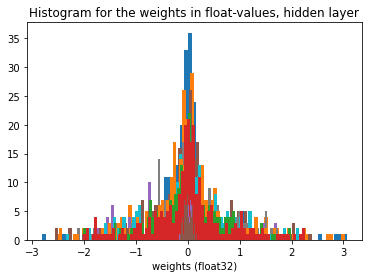

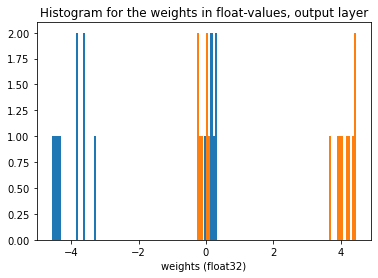

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
#from keras_visualizer import visualizer
#Experiment Nr.3: Visualize weights, biases and network structure for float-model


model_name = 'model_fc_1l_16'
model = keras.models.load_model(f'models/'+model_name+'.h5', compile=False)

w1 = model.layers[0].get_weights()[0]
b1 = model.layers[0].get_weights()[1]
w2 = model.layers[1].get_weights()[0]
b2 = model.layers[1].get_weights()[1]


print(w1.shape, b1.shape,w2.shape,b2.shape)
print(w1)#, b1[0])
print(w2)#, b2[0])
print(np.min(w1),np.max(w1),np.median(w1))
print(np.min(w2),np.max(w2),np.median(w2))
#for i in range(len(w1[:,0])):
 #   plt.plot(w1[i,:], '.')
#plt.show()
#for i in range(len(w1[0,:])):
 #   plt.plot(w1[:,i], '.')
#plt.plot(w1[:,0], '.')
#plt.show()

for i in range(len(w1[0,:])):
    plt.hist(w1[:,i], 75)
plt.title('Histogram for the weights in float-values, hidden layer')
plt.xlabel('weights (float32)')
plt.show()
for i in range(len(w2[0,:])):
    plt.hist(w2[:,i], 75)
plt.title('Histogram for the weights in float-values, output layer')
plt.xlabel('weights (float32)')
plt.show()
#Visualize neural networks:
#keras.utils.plot_model(model, to_file=model_name+'_structure.png', show_shapes=True, show_layer_names=True)
#visualizer(model, format='png', view=True)

(16, 256) (16,) (2, 16) (2,)
[[ -2   3   5 ...   5  19  12]
 [  7   0   5 ...  14   2 -12]
 [ -1  -4  -4 ...   2  -2  -2]
 ...
 [  2   6  -2 ...  -2   1   9]
 [ -1  -1   4 ...  -3  -1   0]
 [  2  -2  -1 ...  -1  -1  -1]]
[[-100 -107   -1    6 -125 -106    1  -91    8 -127    9 -101 -120 -123
     5    4]
 [ 120  118   -5    1  113  123   -3  111   -7  108    1  102  124  117
     1   -7]]
-117 127 0.0
-127 124 1.0


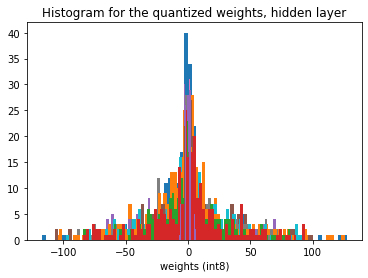

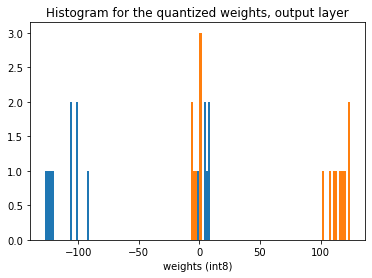

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
#Experiment Nr.3: Visualize weights, biases and network structure for quantized model


model_name = 'model_fc_1l_16'
w1 = np.load(f"/home/luca/Documents/Project/models/quantized/weights_biases/"+model_name+"_weights_1.npy") #shape(dim, 256)
b1 = np.load(f"/home/luca/Documents/Project/models/quantized/weights_biases/"+model_name+"_biases_1.npy")
w2 = np.load(f"/home/luca/Documents/Project/models/quantized/weights_biases/"+model_name+"_weights_2.npy") # shape(2, dim)
b2 = np.load(f"/home/luca/Documents/Project/models/quantized/weights_biases/"+model_name+"_biases_2.npy")


#for i in range(len(w1[0,:])):
 #   plt.plot(w1[:,i], '.')
#plt.show()

#for i in range(len(w1[:,0])):
 #   plt.plot(w1[i,:], '.')
#plt.show()
print(w1.shape, b1.shape,w2.shape,b2.shape)
print(w1)#, b1[0])
print(w2)#, b2[0])
print(np.min(w1),np.max(w1),np.median(w1))
print(np.min(w2),np.max(w2),np.median(w2))

for i in range(len(w1[:,0])):
    plt.hist(w1[i,:], 75)
plt.title('Histogram for the quantized weights, hidden layer')
plt.xlabel('weights (int8)')
plt.show()
for i in range(len(w2[:,0])):
    plt.hist(w2[i,:], 75)
plt.title('Histogram for the quantized weights, output layer')
plt.xlabel('weights (int8)')
plt.show()
